# To classify cats and dogs from given coloured pictures

### Details
1. Binary classification problem <br>
2. coloured Images <br>
3. No standard Dimension <br>
4. Dataset will be taken from kaggle(site where multiple data science competitions are held, and various datasets are also available) <br>
5. We'll have to use the subset of the data <br>

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
tf.__version__

'2.3.0'

In [4]:
# Dataset consists of 4000 images distributed in to 2000 images for train set(both cats and dogs) ,1000 images for validation
# set and 1000 images for test set


# Importing directories

In [5]:
train_dir = r"C:\Users\USER\OneDrive\Desktop\ml\CNN\train"
valid_dir = r"C:\Users\USER\OneDrive\Desktop\ml\CNN\validation"
test_dir = r"C:\Users\USER\OneDrive\Desktop\ml\CNN\test"

# Data preprocessing
Since the data isn't standardised we need to perform some steps
<ul>
    <li>read the picture files</li>
    <li>Decode jpg format into RBG</li>
    <li>Convert these files into floating point tensors</li>
    <li>Rescale the pixels of range[0 to 255] into [0,1] range</li>
</ul><br>
This can be done by ImageDataGenerator module of tensorflow library

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
# Generating batches of tensor image data
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

# Since my data is located in folder I need to use the below function
train_gen = train_datagen.flow_from_directory(train_dir,
                                             target_size = (150,150),
                                             batch_size = 20,
                                             class_mode = "binary")
validation_gen = test_datagen.flow_from_directory(valid_dir,
                                             target_size = (150,150),
                                             batch_size = 20,
                                             class_mode = "binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [14]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation = "relu", input_shape = (150,150,3)))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Conv2D(64, (3,3), activation = "relu"))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Conv2D(128, (3,3), activation = "relu"))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Conv2D(128, (3,3), activation = "relu"))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation = "relu"))

model.add(layers.Dense(1, activation = "sigmoid"))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [19]:
from tensorflow.keras import optimizers

model.compile(loss = "binary_crossentropy",
             optimizer = optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [20]:
history = model.fit_generator(train_gen,
                             steps_per_epoch = 100,
                             epochs = 20,
                             validation_data=validation_gen,
                             validation_steps=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
100/100 [==============================] - 57s 575ms/step - loss: 0.6914 - acc: 0.5405 - val_loss: 0.6707 - val_acc: 0.6260
Epoch 2/20
100/100 [==============================] - 58s 585ms/step - loss: 0.6546 - acc: 0.6240 - val_loss: 0.6368 - val_acc: 0.6490
Epoch 3/20
100/100 [==============================] - 57s 573ms/step - loss: 0.5998 - acc: 0.6845 - val_loss: 0.6081 - val_acc: 0.6530
Epoch 4/20
100/100 [==============================] - 52s 522ms/step - loss: 0.5581 - acc: 0.7195 - val_loss: 0.6037 - val_acc: 0.6590
Epoch 5/20
100/100 [==============================] - 52s 520ms/step - loss: 0.5299 - acc: 0.7260 - val_loss: 0.5881 - val_acc: 0.6820
Epoch 6/20
100/100 [==============================] - 52s 519ms/step - loss: 0.5103 - acc: 0.7330 - val_loss: 0.5691 - val_acc: 0.6940
Epoch 7/20
100/100 [==============================] - 53s 526ms/step - loss: 0.4764 - acc: 0.7655 - val_loss: 0.60

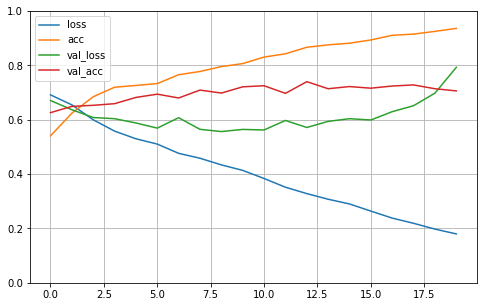

In [21]:
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [22]:
model.save("CNNmodel.h5")

In [23]:
from tensorflow.keras import backend as K
K.clear_session()

In [25]:
del model

# Data Augmentation

In [9]:
train_datagen = ImageDataGenerator(rescale = 1/255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                   target_size=(150,150),
                                                   batch_size=20,
                                                   class_mode='binary')

validation_generator = test_datagen.flow_from_directory(valid_dir, 
                                                   target_size=(150,150),
                                                   batch_size=20,
                                                   class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [27]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation = "relu", input_shape = (150,150,3)))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Conv2D(64, (3,3), activation = "relu"))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Conv2D(128, (3,3), activation = "relu"))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Conv2D(128, (3,3), activation = "relu"))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))

from tensorflow.keras import optimizers

model.compile(loss = "binary_crossentropy",
             optimizer = optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [28]:
# We cannot use 100 as steps_per_epoch 
# this is because we have 1000 images in training data and  batch size is 32 now 1000/32=31.25   hence we only have 31 batches 
# so our input data have only 31 batches but we are training for 100 batches hence the error occured(input ran out of data)
history = model.fit_generator(train_generator,
                             steps_per_epoch = 100,
                             epochs = 50,
                             validation_data=validation_generator,
                             validation_steps=50)

Epoch 1/50
100/100 [==============================] - 53s 532ms/step - loss: 0.6936 - acc: 0.5140 - val_loss: 0.6875 - val_acc: 0.5000
Epoch 2/50
100/100 [==============================] - 61s 610ms/step - loss: 0.6871 - acc: 0.5415 - val_loss: 0.6698 - val_acc: 0.5830
Epoch 3/50
100/100 [==============================] - 56s 559ms/step - loss: 0.6714 - acc: 0.5870 - val_loss: 0.6677 - val_acc: 0.5630
Epoch 4/50
100/100 [==============================] - 53s 534ms/step - loss: 0.6635 - acc: 0.5960 - val_loss: 0.6636 - val_acc: 0.5990
Epoch 5/50
100/100 [==============================] - 56s 562ms/step - loss: 0.6511 - acc: 0.6255 - val_loss: 0.6353 - val_acc: 0.6210
Epoch 6/50
100/100 [==============================] - 56s 564ms/step - loss: 0.6367 - acc: 0.6245 - val_loss: 0.6430 - val_acc: 0.6230
Epoch 7/50
100/100 [==============================] - 54s 543ms/step - loss: 0.6216 - acc: 0.6565 - val_loss: 0.6345 - val_acc: 0.6120
Epoch 8/50
100/100 [==============================] - 5

In [29]:
model.save("CNN_augmented.h5")

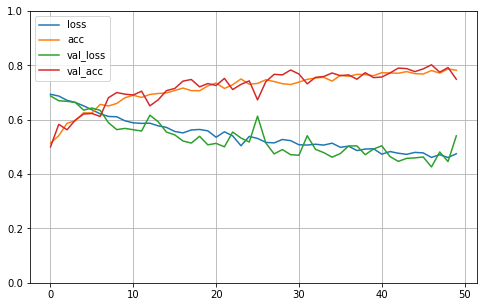

In [30]:
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# Final Testing

In [10]:
# The increased accuracy could be further achieved by using VGG16
# VGG16 is a convolution neural net (CNN ) architecture which won ILSVR(Imagenet) competition in 2014
test_generator = test_datagen.flow_from_directory(test_dir, 
                                                   target_size=(150,150),
                                                   batch_size=20,
                                                   class_mode='binary')

Found 1000 images belonging to 2 classes.


In [11]:
model = keras.models.load_model("CNN_augmented.h5")

In [15]:
model.evaluate_generator(test_generator,steps=50)
# First argument is the loss value and the second one is accuracy

[0.5946904420852661, 0.7250000238418579]